In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

Convolution Neural Network는 이미지에서 특징을 다시 추출하기 위해 슬라이딩 윈도우 - 커널이라고도 합니다. - 를 이미지 행렬에 곱하는 기법입니다. 이렇게 만들어진 층을 컨볼루션(합성곱)이라고 합니다.

가장 잘 설명되어 있는 사이트를 소개해드리죠.

https://wikidocs.net/80437

원래는 feature extraction은 사람이 일일이 해줘야하지만...
이렇게 컨볼루션을 이용하면 feature extraction을 자동으로 처리해줄 수 있습니다.

참고로 중요한 점은, 컨볼루션 층을 거치고 나면, 원래 이미지의 크기가 줄어든다는 겁니다. 이에 유의해서 층을 설계해야합니다.

또한 여러개의 커널을 만들어서 다양한 컨볼루션을 만들 수도 있다.

Conv2D(사용할 커널 개수, 커널의 행/열 크기, 입력하는 (행,열,색상개수(greyscale =1, color =3)), 활성화 함수)

세번째 인자는 입력층에서만 정해주면 됩니다.

----

컨볼루션을 했음에도 이미지 행렬이 여전히 크다면 max pooling 혹은 average pooling으로 그 크기를 줄일 수 있다.

풀링을 적용하면 전체 크기가 줄어듭니다.

MaxPooling2D(pool_size=사이즈를 줄일 배수)

----

과적합을 줄이는 방법 중 하나인 drop out은, 은닉층의 노드 중 일부를 랜덤하게 가중치 곱을 해주지 않는 기법입니다. 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있다는데... 이게 설명 가능한 방법인지는 잘 모르겠네요.

Dropout(1이하의 양의 소수)

라고 적으면 인자 만큼의 노드가 가중치 곱이 적용되지 않습니다.

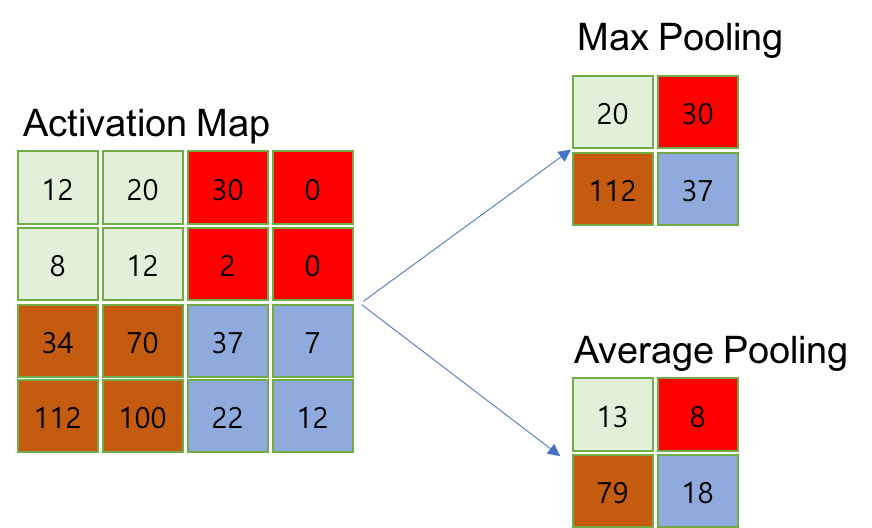

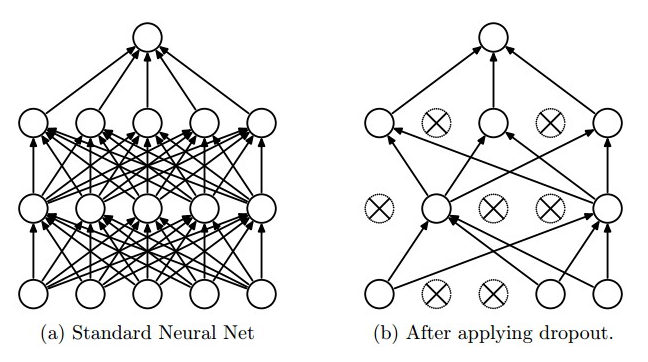

In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
# Conv2D(사용할 커널 개수, 커널의 행/열 크기, 입력하는 (행,열,색상개수(greyscale =1, color =3)), 활성화 함수)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # Convolution layer 생성
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten()) # 2차원 배열을 1차원 배열로 변경해준다.
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Epoch 00001: val_loss improved from inf to 0.05625, saving model to ./model/01-0.0562.hdf5

Epoch 00002: val_loss improved from 0.05625 to 0.03850, saving model to ./model/02-0.0385.hdf5

Epoch 00003: val_loss improved from 0.03850 to 0.03328, saving model to ./model/03-0.0333.hdf5

Epoch 00004: val_loss did not improve from 0.03328

Epoch 00005: val_loss improved from 0.03328 to 0.03193, saving model to ./model/05-0.0319.hdf5

Epoch 00006: val_loss improved from 0.03193 to 0.02632, saving model to ./model/06-0.0263.hdf5

Epoch 00007: val_loss did not improve from 0.02632

Epoch 00008: val_loss did not improve from 0.02632

Epoch 00009: val_loss did not improve from 0.02632

Epoch 00010: val_loss did not improve from 0.02632

Epoch 00011: val_loss did not improve from 0.02632

Epoch 00012: val_loss improved from 0.02632 to 0.02519, saving model to ./model/12-0.0252.hdf5

Epoch 00013: val_loss did not im

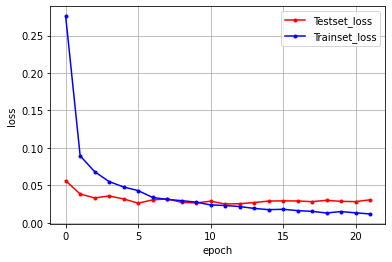

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

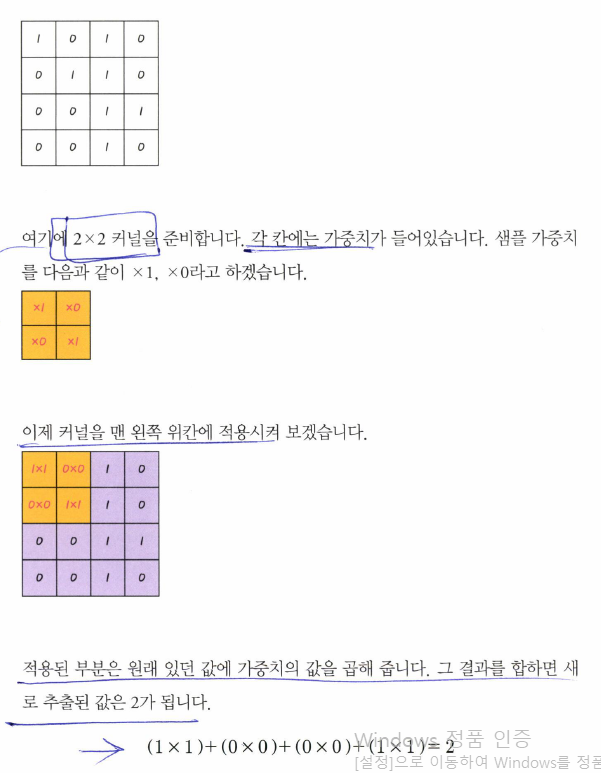

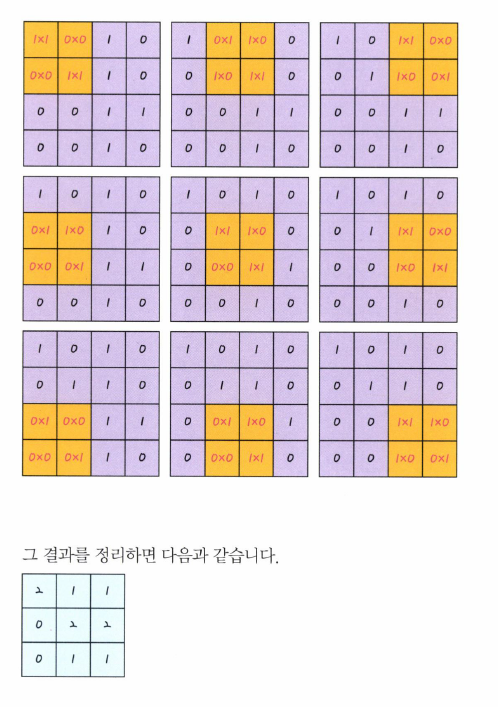

이렇게 만들어진 새로운 층 = Convolution